In [ ]:
import pandas as pd

# Đọc file CSV
input_file = "C:/thaiduong/SocialNetwork/movie_dataset.csv"  # Thay đường dẫn đúng với file của bạn
df = pd.read_csv(input_file)

# Xem trước dữ liệu
df.head()


,Movie Title,Tomatometer,Popcornmeter,Director,Producer,Screenwriter,Distributor,Production Co,Rating,Genre,Original Language,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Sound Mix,Aspect Ratio,Cast
0,John Wick,86%,81%,Chad Stahelski,"Basil Iwanyk, Mike Witherill, David Leitch, Ev...",Derek Kolstad,Lionsgate Films,"87eleven, Defynite Films, Thunder Road Pictures",R (Language|Brief Drug Use|Strong Bloody Viole...,"Action, Mystery & Thriller",English,"Oct 24, 2014, Wide",7-Jun-16,$43.0M,1h 41m,"Dolby Digital, Datasat, Dolby Atmos",Digital 2.39:1,"Chad Stahelski, Keanu Reeves, Michael Nyqvist,..."
1,Red Army,92%,85%,Gabe Polsky,Gabe Polsky,Gabe Polsky,Sony Pictures Classics,Gabriel Polsky Productions,PG (Thematic Material|Language),Documentary,English,"Jan 23, 2015, Limited",30-Nov-16,$728.7K,1h 25m,NaN,NaN,"Gabe Polsky, Scotty Bowman, Viacheslav Fetisov..."
2,Roman Holiday,96%,93%,William Wyler,William Wyler,"Dalton Trumbo, Ian McLellan Hunter, John Dighton",Paramount Pictures,Paramount Pictures,NaN,"Romance, Comedy",English,"Aug 27, 1953, Original",6-Jun-14,NaN,1h 59m,Mono,NaN,"William Wyler, Gregory Peck, Audrey Hepburn, E..."
3,The Merry Gentlemen,44%,22%,Peter Sullivan,"Jeffrey Schenck, Barry Barnholtz, Brian Nolan,...","Jeffrey Schenck, Peter Sullivan, Marla Sokoloff",Netflix,"Hybrid, Gentlemen Media Group",NaN,"Holiday, Comedy, Romance",English,NaN,20-Nov-24,NaN,1h 26m,NaN,NaN,"Peter Sullivan, Britt Robertson, Chad Michael ..."
4,"LaRoy, Texas",100%,66%,Shane Atkinson,"Caddy Vanasirikul, Sebastien Aubert, Jeremie G...",Shane Atkinson,Brainstorm Media,Adastra Films,NaN,"Comedy, Mystery & Thriller, Crime",English,"Apr 12, 2024, Limited",12-Apr-24,NaN,1h 50m,NaN,NaN,"Shane Atkinson, Steve Zahn, Dylan Baker, John ..."


In [ ]:
import networkx as nx

# Tạo đồ thị
G = nx.Graph()

# Duyệt qua từng bộ phim trong DataFrame
for _, row in df.iterrows():
    # Lấy thông tin cơ bản từ dòng
    movie_title = row["Movie Title"]
    director = row["Director"]
    cast = row["Cast"].split(", ") if pd.notnull(row["Cast"]) else []
    genres = row["Genre"].split(", ") if pd.notnull(row["Genre"]) else []

    # Thêm nút cho bộ phim
    G.add_node(movie_title, type="movie")

    # Thêm nút và cạnh cho đạo diễn
    if pd.notnull(director):
        G.add_node(director, type="director")
        G.add_edge(movie_title, director, relation="directed_by")

    # Thêm nút và cạnh cho diễn viên
    for actor in cast:
        G.add_node(actor, type="actor")
        G.add_edge(movie_title, actor, relation="starred_in")

    # Thêm nút và cạnh cho thể loại
    for genre in genres:
        G.add_node(genre, type="genre")
        G.add_edge(movie_title, genre, relation="belongs_to")

# Kiểm tra số lượng nút và cạnh
print(f"Số lượng nút: {G.number_of_nodes()}")
print(f"Số lượng cạnh: {G.number_of_edges()}")

Số lượng nút: 5691
Số lượng cạnh: 9019


In [ ]:
import matplotlib.pyplot as plt

# Tùy chỉnh kích thước nút dựa trên loại
node_colors = []
for node, attr in G.nodes(data=True):
    if attr["type"] == "movie":
        node_colors.append("blue")
    elif attr["type"] == "director":
        node_colors.append("green")
    elif attr["type"] == "actor":
        node_colors.append("red")
    elif attr["type"] == "genre":
        node_colors.append("orange")
    else:
        node_colors.append("gray")

# Vẽ đồ thị
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    font_size=8,
    font_color="black",
)
plt.show()

In [4]:
# Lưu đồ thị dưới dạng GraphML
nx.write_graphml(G, "movie_graph.graphml")

# Đọc lại đồ thị từ file
G_loaded = nx.read_graphml("movie_graph.graphml")

In [1]:
import pandas as pd
import networkx as nx

# Đọc dữ liệu từ file CSV
file_path = "movie_dataset.csv"  # Thay bằng đường dẫn thực tế
df = pd.read_csv(file_path)
df["Tomatometer"] = (
    df["Tomatometer"]
    .str.rstrip("%")  # Loại bỏ dấu `%`
    .astype(float, errors="ignore")  # Chuyển sang kiểu float
)

# 2. Xử lý cột Popcornmeter
df["Popcornmeter"] = (
    df["Popcornmeter"]
    .str.rstrip("%")  # Loại bỏ dấu `%`
    .astype(float, errors="ignore")  # Chuyển sang kiểu float
)

# 3. Kiểm tra giá trị rỗng
print("Số giá trị rỗng trong Tomatometer:", df["Tomatometer"].isna().sum())
print("Số giá trị rỗng trong Popcornmeter:", df["Popcornmeter"].isna().sum())

# 4. Xử lý giá trị rỗng
# Thay giá trị rỗng bằng giá trị trung bình
df["Tomatometer"].fillna(df["Tomatometer"].mean(), inplace=True)
df["Popcornmeter"].fillna(df["Popcornmeter"].mean(), inplace=True)
# Tạo đồ thị
G = nx.Graph()

# Duyệt qua từng dòng dữ liệu
for index, row in df.iterrows():
    movie_title = row["Movie Title"]
    director = row["Director"]
    cast = row["Cast"]

    # Đảm bảo dữ liệu không bị thiếu
    if pd.isna(movie_title) or pd.isna(director) or pd.isna(cast):
        continue

    # Tách danh sách đạo diễn và diễn viên
    directors = [d.strip() for d in director.split(",")]
    casts = [c.strip() for c in cast.split(",")]

    # Loại bỏ tên đạo diễn khỏi danh sách diễn viên (nếu trùng)
    casts = [c for c in casts if c not in directors]

    # Thêm nút cho phim
    G.add_node(movie_title, type="movie")

    # Thêm nút và cạnh cho đạo diễn
    for d in directors:
        G.add_node(d, type="director")
        G.add_edge(movie_title, d, relation="directed_by")

    # Thêm nút và cạnh cho diễn viên
    for c in casts:
        G.add_node(c, type="actor")
        G.add_edge(movie_title, c, relation="starred_in")

# In thông tin cơ bản về đồ thị
print(f"Số lượng đỉnh: {G.number_of_nodes()}")
print(f"Số lượng cạnh: {G.number_of_edges()}")

# Kiểm tra ví dụ: Các đỉnh kết nối với một bộ phim cụ thể
example_movie = "John Wick"  # Thay bằng tên phim trong dữ liệu của bạn
if example_movie in G:
    print(f"Các kết nối của '{example_movie}': {list(G.neighbors(example_movie))}")

Số giá trị rỗng trong Tomatometer: 6
Số giá trị rỗng trong Popcornmeter: 9
Số lượng đỉnh: 5596
Số lượng cạnh: 6450
Các kết nối của 'John Wick': ['Chad Stahelski', 'Keanu Reeves', 'Michael Nyqvist', 'Alfie Allen', 'Willem Dafoe', 'Dean Winters']


C:\Users\huyma\AppData\Local\Temp\ipykernel_9816\3844723122.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tomatometer"].fillna(df["Tomatometer"].mean(), inplace=True)
C:\Users\huyma\AppData\Local\Temp\ipykernel_9816\3844723122.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [2]:
# Lưu đồ thị dưới dạng GraphML
nx.write_graphml(G, "movie_graph.graphml")

# Đọc lại đồ thị từ file
G_loaded = nx.read_graphml("movie_graph.graphml")

In [3]:
# Tính Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Tính Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Tính Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Tính PageRank
pagerank = nx.pagerank(G)

# Tính Clustering Coefficient
clustering_coefficient = nx.clustering(G)

# Thêm các đặc trưng này vào bộ dữ liệu phim
for index, row in df.iterrows():
    movie_title = row["Movie Title"]
    if movie_title in G:
        df.at[index, "Degree Centrality"] = degree_centrality.get(movie_title, 0)
        df.at[index, "Closeness Centrality"] = closeness_centrality.get(movie_title, 0)
        df.at[index, "Betweenness Centrality"] = betweenness_centrality.get(
            movie_title, 0
        )
        df.at[index, "PageRank"] = pagerank.get(movie_title, 0)
        df.at[index, "Clustering Coefficient"] = clustering_coefficient.get(
            movie_title, 0
        )

In [5]:
# Các cột đặc trưng (features) và mục tiêu (target)
features = [
    "Degree Centrality",
    "Closeness Centrality",
    "Betweenness Centrality",
    "PageRank",
    "Clustering Coefficient",
]
X = df[features]
# y_tomatometer = df["Tomatometer"].str.rstrip("%").astype(float)  # Chuyển đổi sang số
# y_popcornmeter = df["Popcornmeter"].str.rstrip("%").astype(float)
y_tomatometer = df["Tomatometer"]
y_popcornmeter = df["Popcornmeter"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_tomatometer, y_test_tomatometer = train_test_split(
    X, y_tomatometer, test_size=0.2, random_state=42
)

X_train, X_test, y_train_popcornmeter, y_test_popcornmeter = train_test_split(
    X, y_popcornmeter, test_size=0.2, random_state=42
)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Huấn luyện mô hình dự đoán Tomatometer
model_tomatometer = RandomForestRegressor(random_state=42)
model_tomatometer.fit(X_train, y_train_tomatometer)

# Dự đoán và đánh giá
y_pred_tomatometer = model_tomatometer.predict(X_test)
mse_tomatometer = mean_squared_error(y_test_tomatometer, y_pred_tomatometer)
print(f"MSE cho Tomatometer: {mse_tomatometer}")

# Huấn luyện mô hình dự đoán Popcornmeter
model_popcornmeter = RandomForestRegressor(random_state=42)
model_popcornmeter.fit(X_train, y_train_popcornmeter)

# Dự đoán và đánh giá
y_pred_popcornmeter = model_popcornmeter.predict(X_test)
mse_popcornmeter = mean_squared_error(y_test_popcornmeter, y_pred_popcornmeter)
print(f"MSE cho Popcornmeter: {mse_popcornmeter}")

MSE cho Tomatometer: 568.7015663560309
MSE cho Popcornmeter: 351.55314972664496


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
r2_popcornmeter = r2_score(y_test_popcornmeter, y_pred_popcornmeter)
r2_tomatometer = r2_score(y_test_tomatometer, y_pred_tomatometer)
print("Tomatometer - R²:", r2_tomatometer)
print("Popcornmeter - R²:", r2_popcornmeter)

Tomatometer - R²: -0.3907097683523584
Popcornmeter - R²: -0.18886698294257753


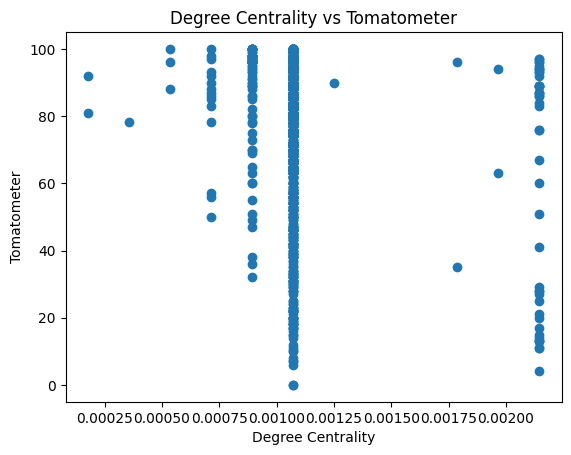

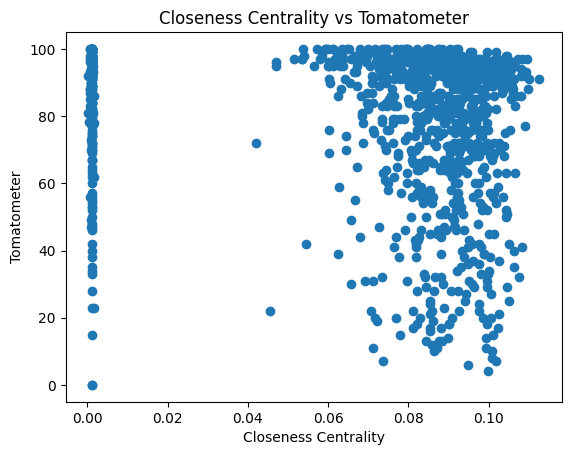

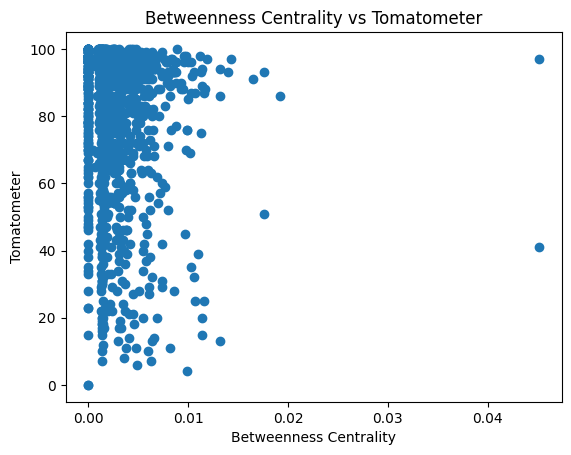

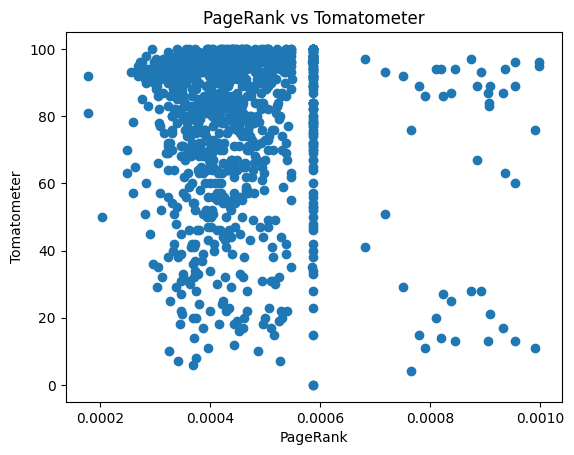

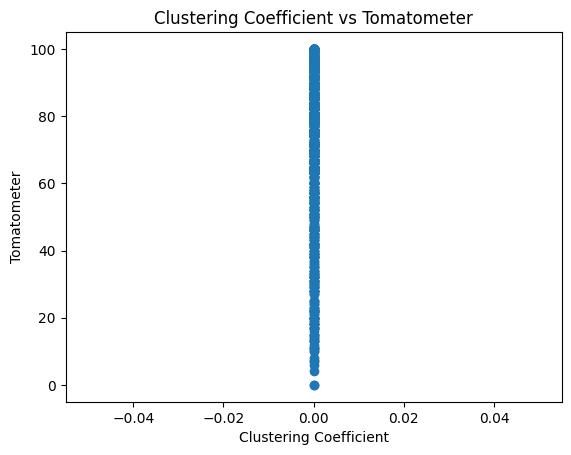

In [10]:
import matplotlib.pyplot as plt

for feature in features:
    plt.scatter(df[feature], df["Tomatometer"])
    plt.title(f"{feature} vs Tomatometer")
    plt.xlabel(feature)
    plt.ylabel("Tomatometer")
    plt.show()